# Problem Statement


Your Client, a chain of hospitals aiming to create the next generation of healthcare for its patients, has retained McKinsey to help achieve its vision. The company brings the best doctors and enables them to provide proactive health care for its patients. One such investment is a Center of Data Science Excellence.

 

In this case, your client wants to have study around one of the critical disease "Stroke". Stroke is a disease that affects the arteries leading to and within the brain. A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures). When that happens, part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die.

 

Over the last few years, the Client has captured several health, demographic and lifestyle details about its patients. This includes details such as age and gender, along with several health parameters (e.g. hypertension, body mass index) and lifestyle related variables (e.g. smoking status, occupation type).

 

The Client wants you to predict the probability of stroke happening to their patients. This will help doctors take proactive health measures for these patients.


# DATA DICTIONARY

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

# EDA: Exploratory Data Analysis

In [171]:
data_train.shape

(43400, 12)

In [172]:
data_test.shape

(18601, 11)

In [173]:
data_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [174]:
data_train.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [176]:
data_train.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000000,43400,43400.000000,43400.000000,43400.000000,43400,43400,43400,43400.000000,41938.000000,30108,43400.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,3,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,25665,NaN,NaN,NaN,27938,24834,21756,NaN,NaN,16053,NaN
mean,36326.142350,NaN,42.217894,0.093571,0.047512,NaN,NaN,NaN,104.482750,28.605038,NaN,0.018041
std,21072.134879,NaN,22.519649,0.291235,0.212733,NaN,NaN,NaN,43.111751,7.770020,NaN,0.133103
min,1.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.000000,10.100000,NaN,0.000000
25%,18038.500000,NaN,24.000000,0.000000,0.000000,NaN,NaN,NaN,77.540000,23.200000,NaN,0.000000
50%,36351.500000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.580000,27.700000,NaN,0.000000
75%,54514.250000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,112.070000,32.900000,NaN,0.000000


In [177]:
data_train['stroke'].value_counts(normalize=True)

0    0.981959
1    0.018041
Name: stroke, dtype: float64

In [178]:
data_train['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [179]:
print('No stroke', round(data_train['stroke'].value_counts(normalize=True)[0]* 100,2), '% of the dataset')
print('Storke', round(data_train['stroke'].value_counts(normalize=True)[1]* 100,2), '% of the dataset')

No stroke 98.2 % of the dataset
Storke 1.8 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Stroke || 1: Stroke)')

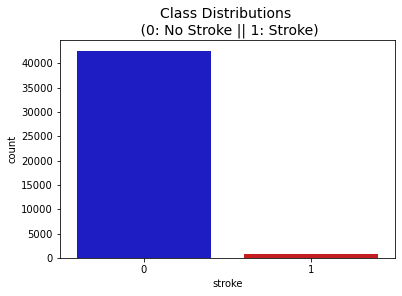

In [180]:
colors = ["#0101DF", "#DF0107"]

sns.countplot('stroke', data=data_train, palette=colors)
plt.title('Class Distributions \n (0: No Stroke || 1: Stroke)', fontsize=14)

In [181]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


Handling Missing Values

In [182]:
data_train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [183]:
data_train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

BMI

In [184]:
data_train['bmi']

0        18.0
1        39.2
2        17.6
3        35.9
4        19.1
         ... 
43395    20.4
43396    55.4
43397    28.9
43398    33.2
43399    20.6
Name: bmi, Length: 43400, dtype: float64

In [185]:
data_train['bmi']=data_train['bmi'].fillna(data_train['bmi'].mean())

In [186]:
data_train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [187]:
data_train['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [188]:
data_train['smoking_status']=data_train['smoking_status'].replace(np.nan, 'Non determined')

In [20]:
data_train['smoking_status']

0         Non determined
1           never smoked
2         Non determined
3        formerly smoked
4         Non determined
              ...       
43395       never smoked
43396    formerly smoked
43397    formerly smoked
43398       never smoked
43399       never smoked
Name: smoking_status, Length: 43400, dtype: object

In [189]:
data_train['smoking_status'].value_counts()

never smoked       16053
Non determined     13292
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [190]:
# Separate cat and num feats for EDA 
target = data_train['stroke']

target_feat = ['stroke']

cat_feats = ['gender',
             'ever_married',
             'work_type',
             'Residence_type',
            'smoking_status', 
            'hypertension',
            'heart_disease']
             

id_feats = ['id']

num_feats = [x for x in data_train.columns if x not in cat_feats+ id_feats+target_feat]


# EDA

In [191]:
num_feats 

['age', 'avg_glucose_level', 'bmi']

In [192]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (10*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

In [193]:
for fet in cat_feats:
     data_train[fet] = data_train[fet].astype('category')

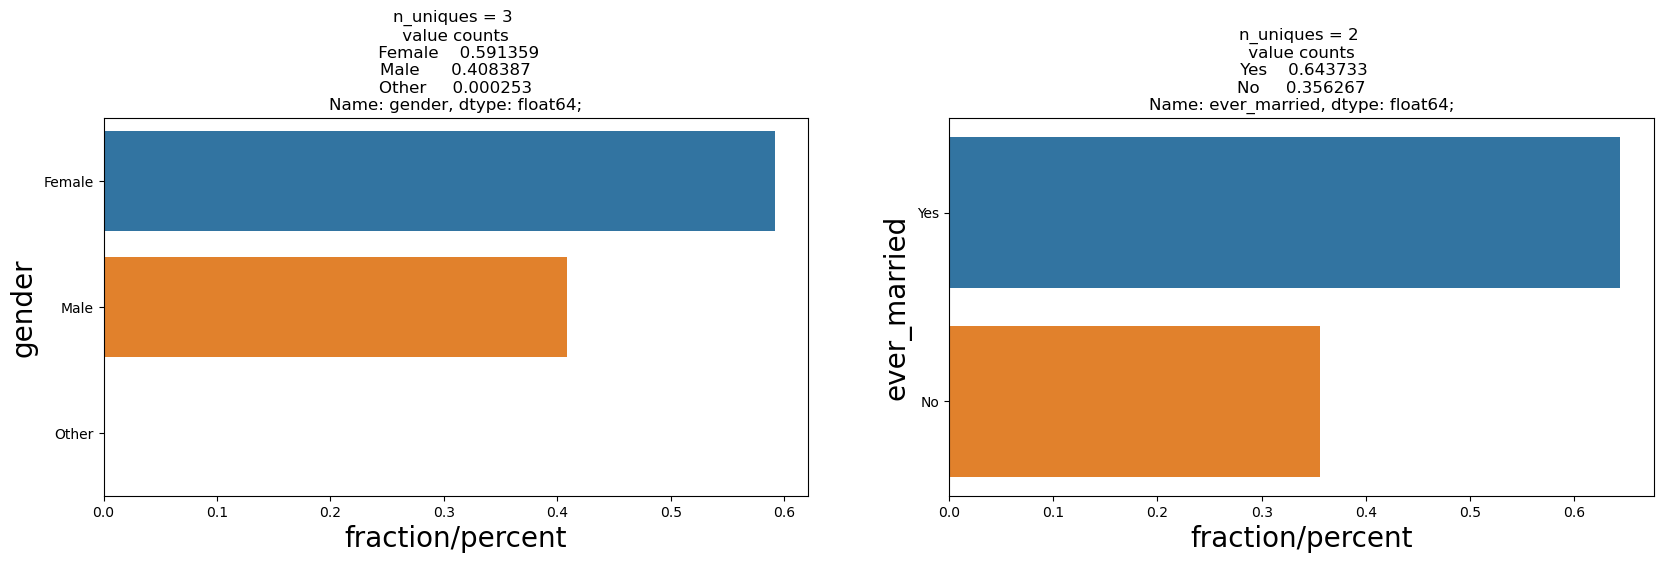

In [194]:
UVA_category(data_train, cat_feats[0:2])

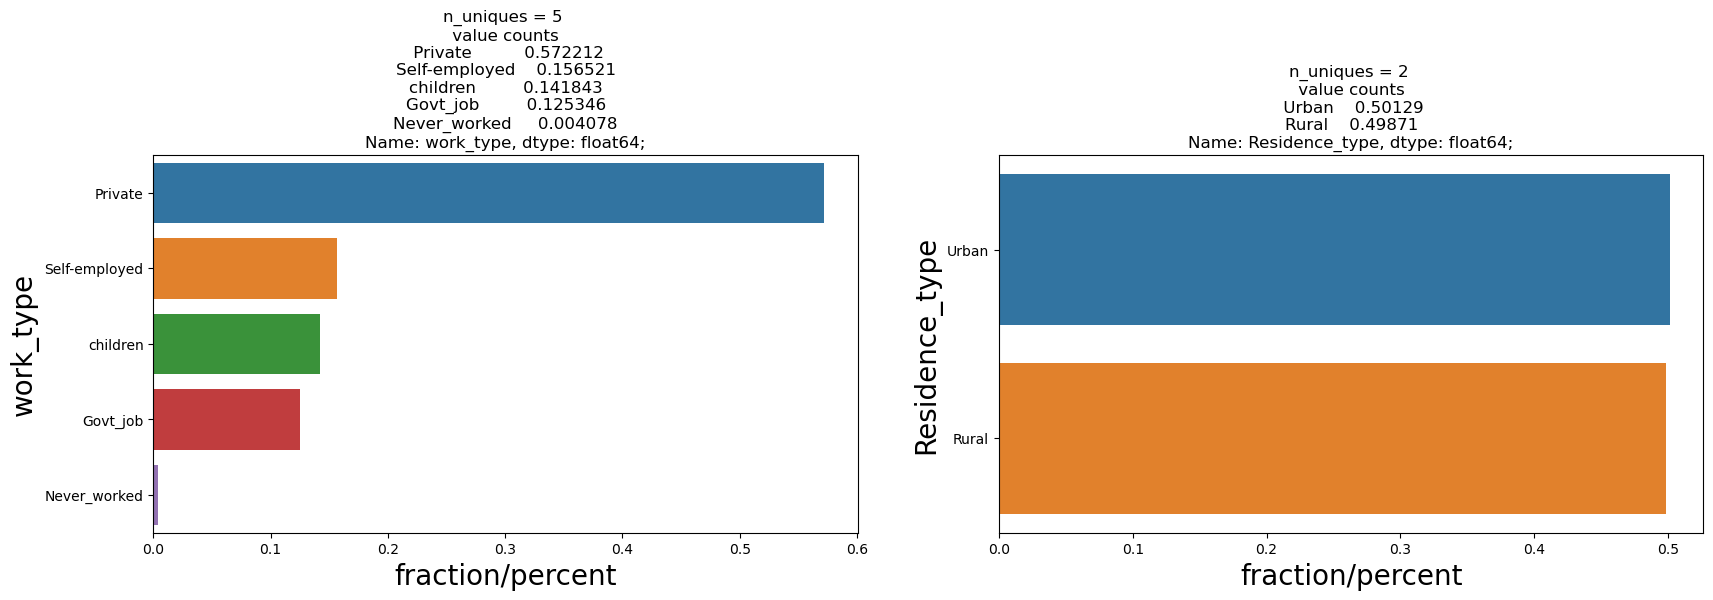

In [199]:
UVA_category(data_train, cat_feats[2:4])

In [28]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
    

    size = len(var_group)
    

    #looping for each variable
    for j,i in enumerate(var_group):
        
        plt.figure(figsize = (7*size,5), dpi = 100)

        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # calculating points of standard deviation
        points = mean-st_dev, mean+st_dev

        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i], shade=True)
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        plt.axvline(mini , color='orange', ls=':', label='Min')
        plt.axvline(maxi, color='yellow', ls=':', label='Max')
        plt.axvline(mean, color='red', ls=':', label='Mean')
        plt.axvline(median, color='green', ls=':', label='Median')
        
        plt.legend()
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                       round(kurt,2),
                                                                                                       round(skew,2),
                                                                                                       (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                       round(mean,2),
                                                                                                       round(median,2)))
       

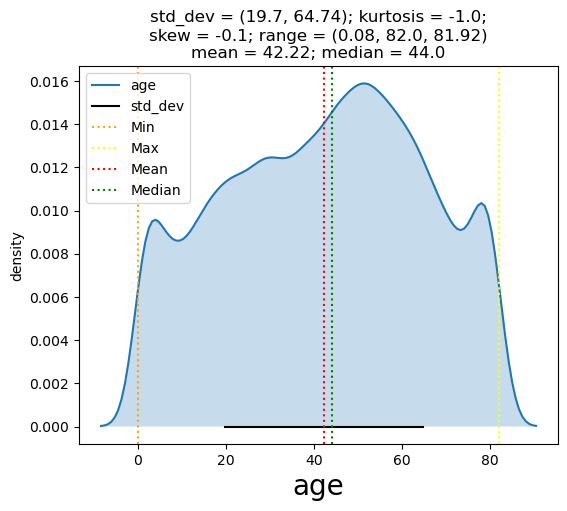

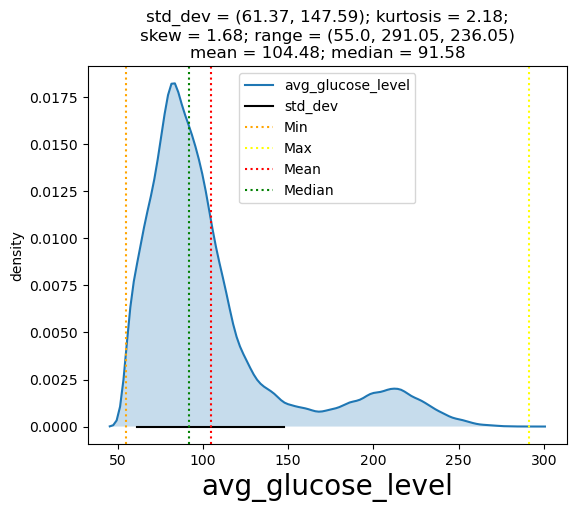

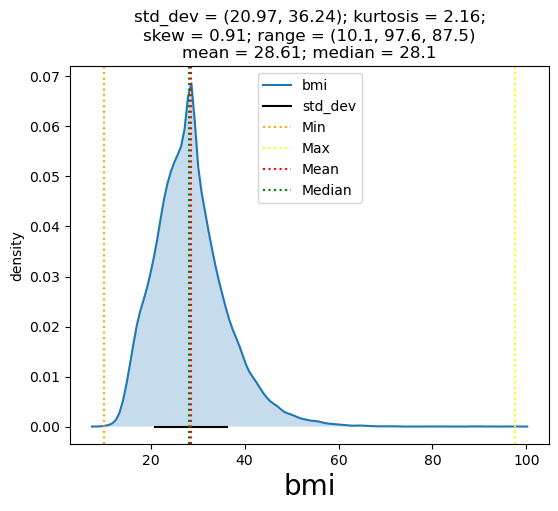

In [29]:
UVA_numeric(data_train, num_feats)

Bivariate Analysis 

In [30]:
def Boxplot_Bivariate(data, cont, cat):
    sns.boxplot(x=cat, y=cont, data=data)
    plt.title('Bivariate boxplot')
    plt.show()

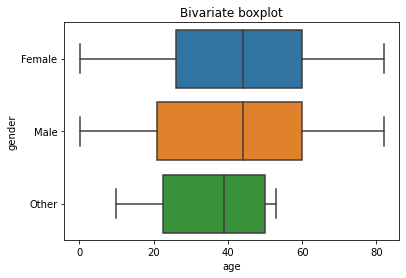

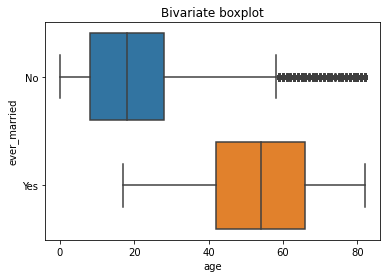

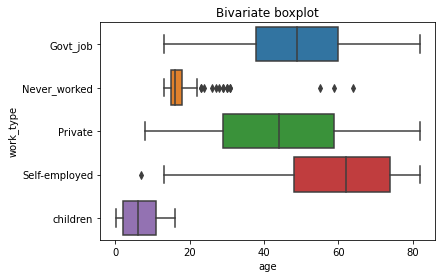

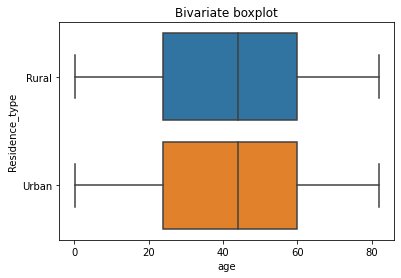

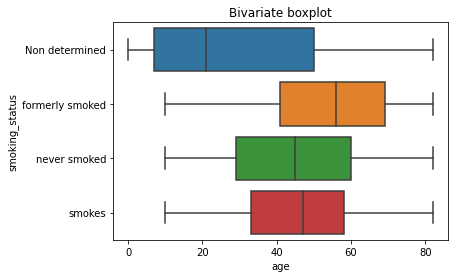

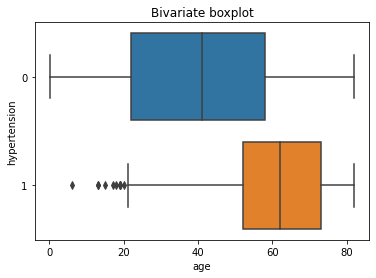

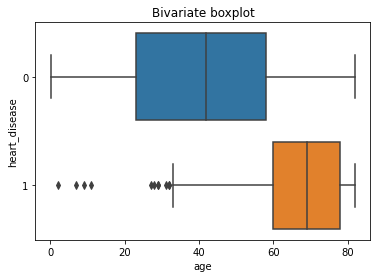

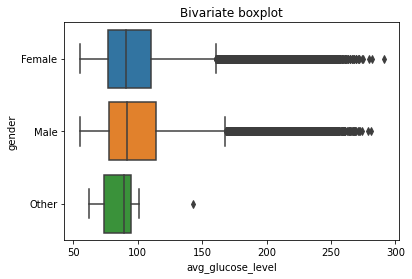

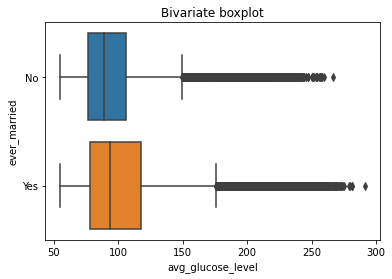

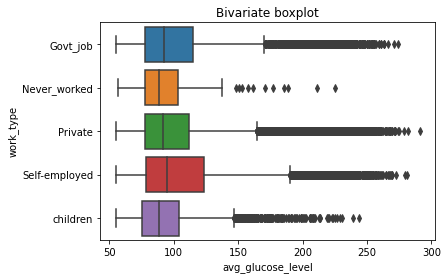

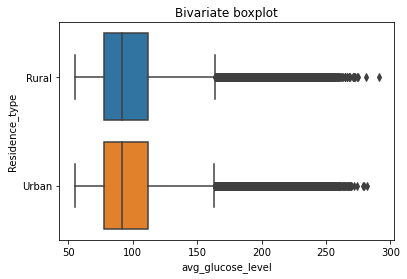

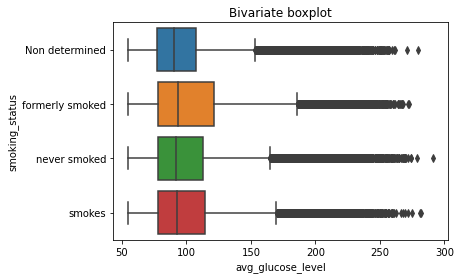

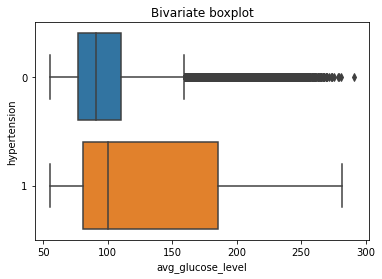

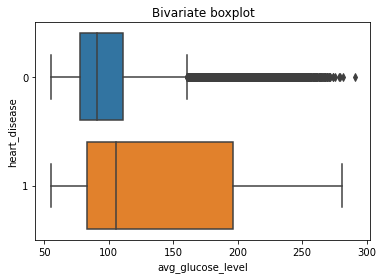

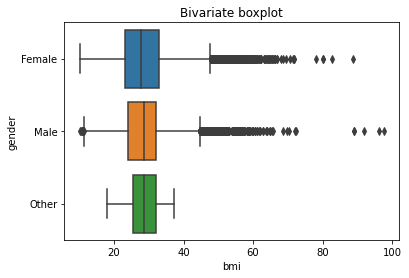

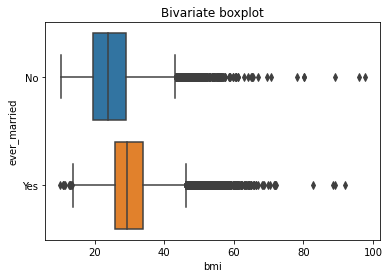

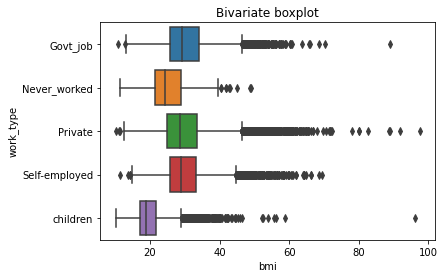

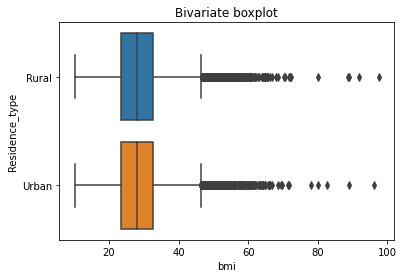

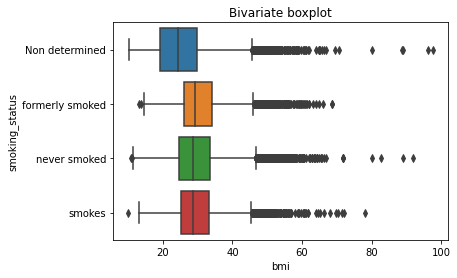

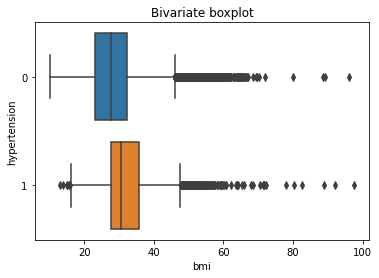

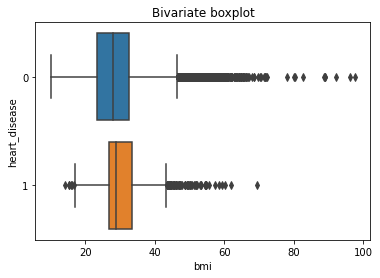

In [31]:
for col1 in num_feats:
    for col2 in cat_feats:
        Boxplot_Bivariate(data_train, col2, col1)

Bivariate Analysis Categorical-Categorical

In [32]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

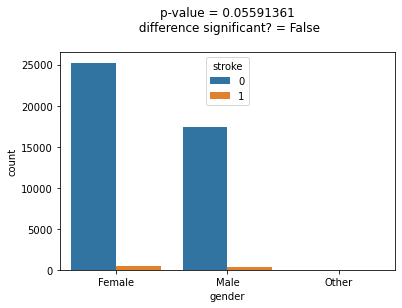

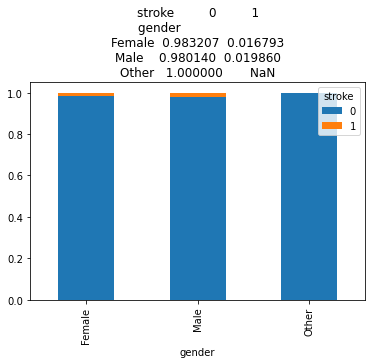

In [33]:
BVA_categorical_plot(data_train,'stroke',cat_feats[0])

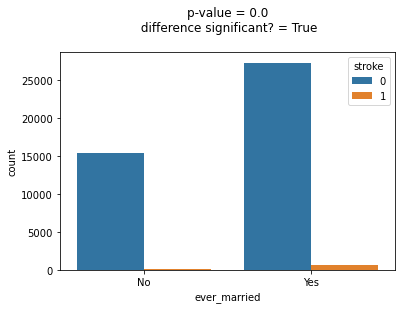

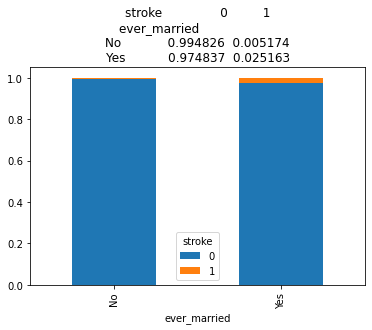

In [34]:
BVA_categorical_plot(data_train,'stroke',cat_feats[1])

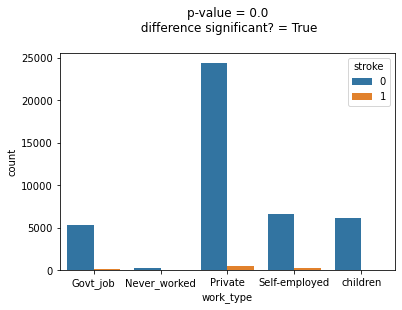

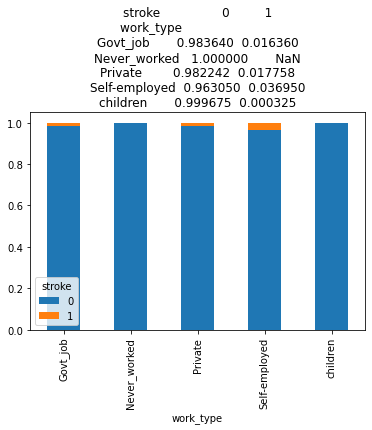

In [35]:
BVA_categorical_plot(data_train,'stroke',cat_feats[2])

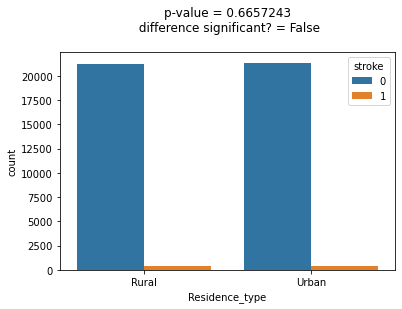

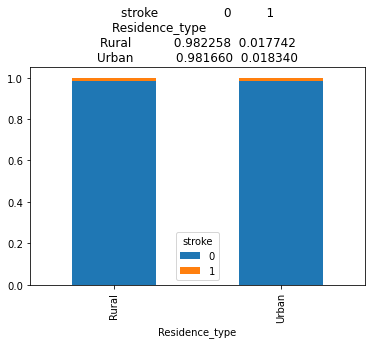

In [36]:
BVA_categorical_plot(data_train,'stroke',cat_feats[3])

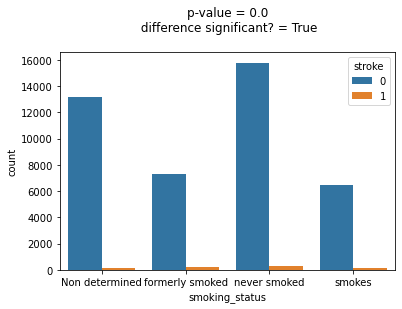

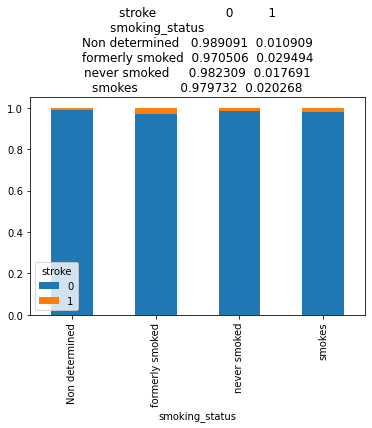

In [37]:
BVA_categorical_plot(data_train,'stroke',cat_feats[4])

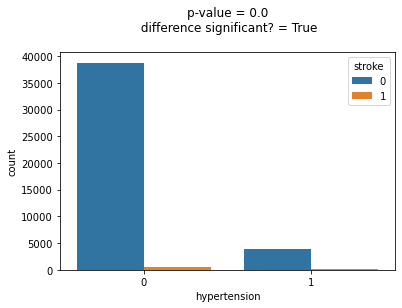

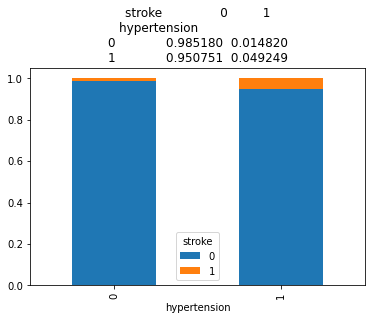

In [38]:
BVA_categorical_plot(data_train,'stroke',cat_feats[5])

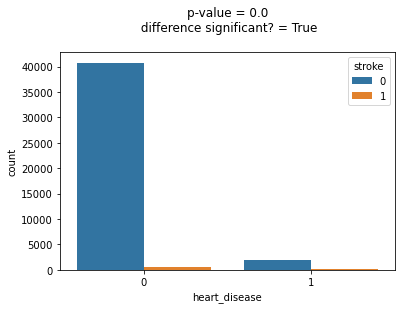

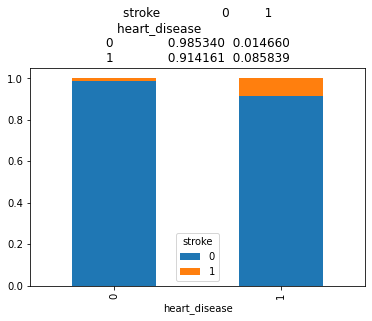

In [39]:
BVA_categorical_plot(data_train,'stroke',cat_feats[6])

Bivariate Continuous Categorical

In [40]:
# Regex for working with text features
import re

# Datetime for working with datetime features
from datetime import timedelta, date

# Modules required for statistical tests
from scipy.stats import norm
from scipy.stats import t as t_dist
from scipy.stats import chi2_contingency

In [41]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    ovr_sigma = np.sqrt(sigma1**2/N1 + sigma2**2/N2)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return pval

In [42]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
    ovr_sd = np.sqrt(sd1**2/n1 + sd2**2/n2)
    t = (X1 - X2)/ovr_sd
    df = n1+n2-2
    pval = 2*(1 - t_dist.cdf(abs(t),df))
    return pval

In [43]:
# Bivariate Cont Cat Exploration Function
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
    x1 = data[cont][data[cat]==category][:]
    x2 = data[cont][~(data[cat]==category)][:]
    
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.std()
    #calculating p-values
    t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
    z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
    plt.figure(figsize = (15,6), dpi=140)
    #barplot
    plt.subplot(1,2,1)
    sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(cat)
    plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=cat, y=cont, data=data)
    plt.title('categorical boxplot')
  

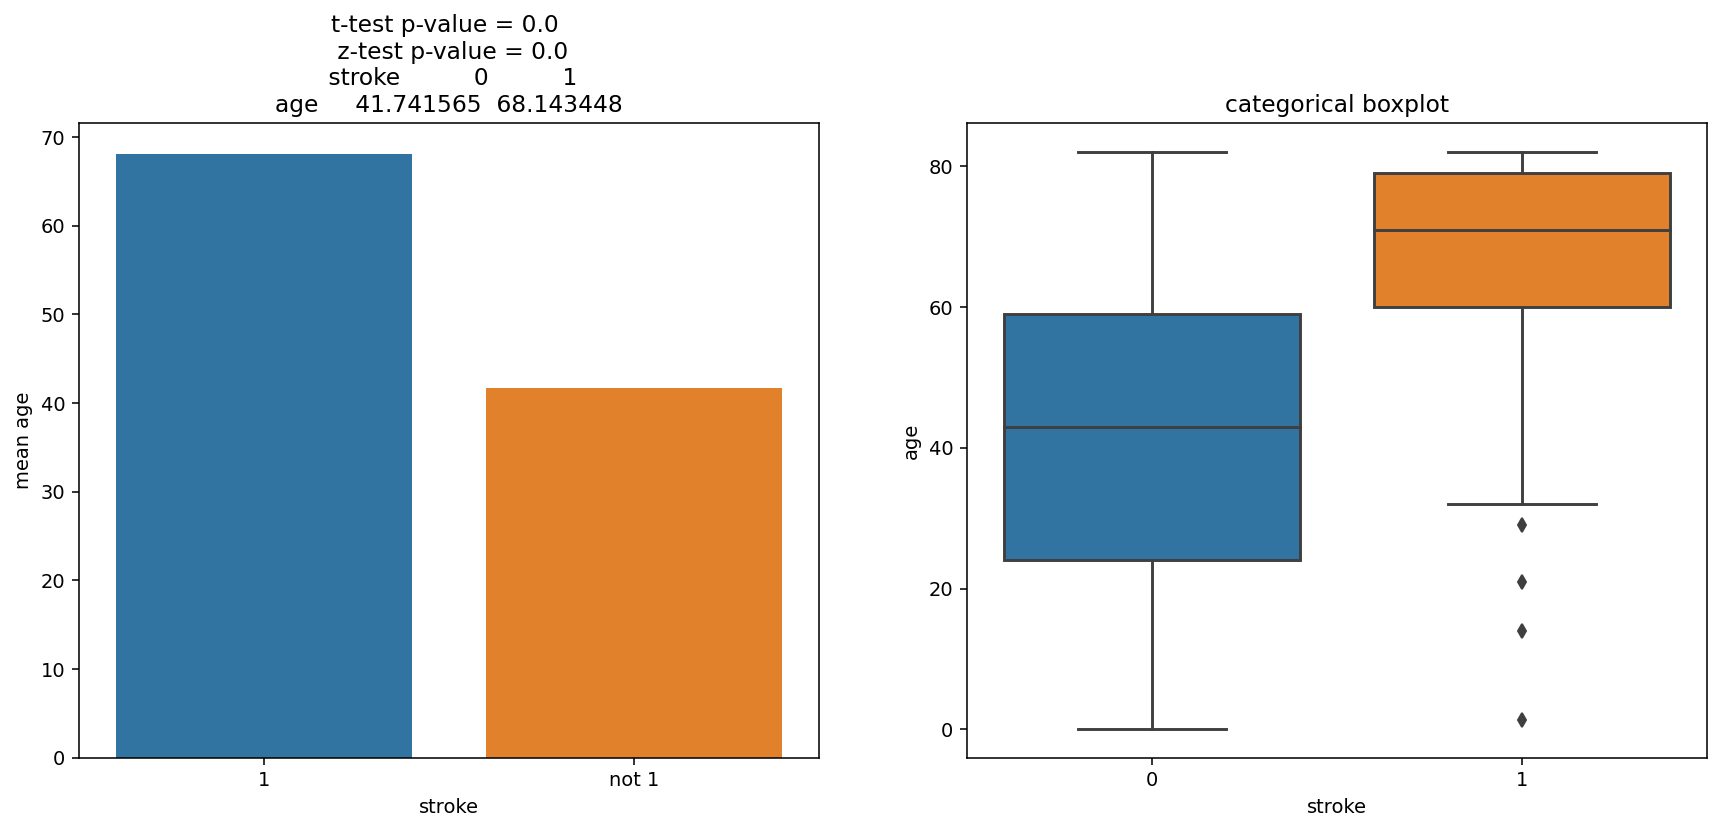

In [44]:
Bivariate_cont_cat(data_train, 'age', 'stroke', 1)

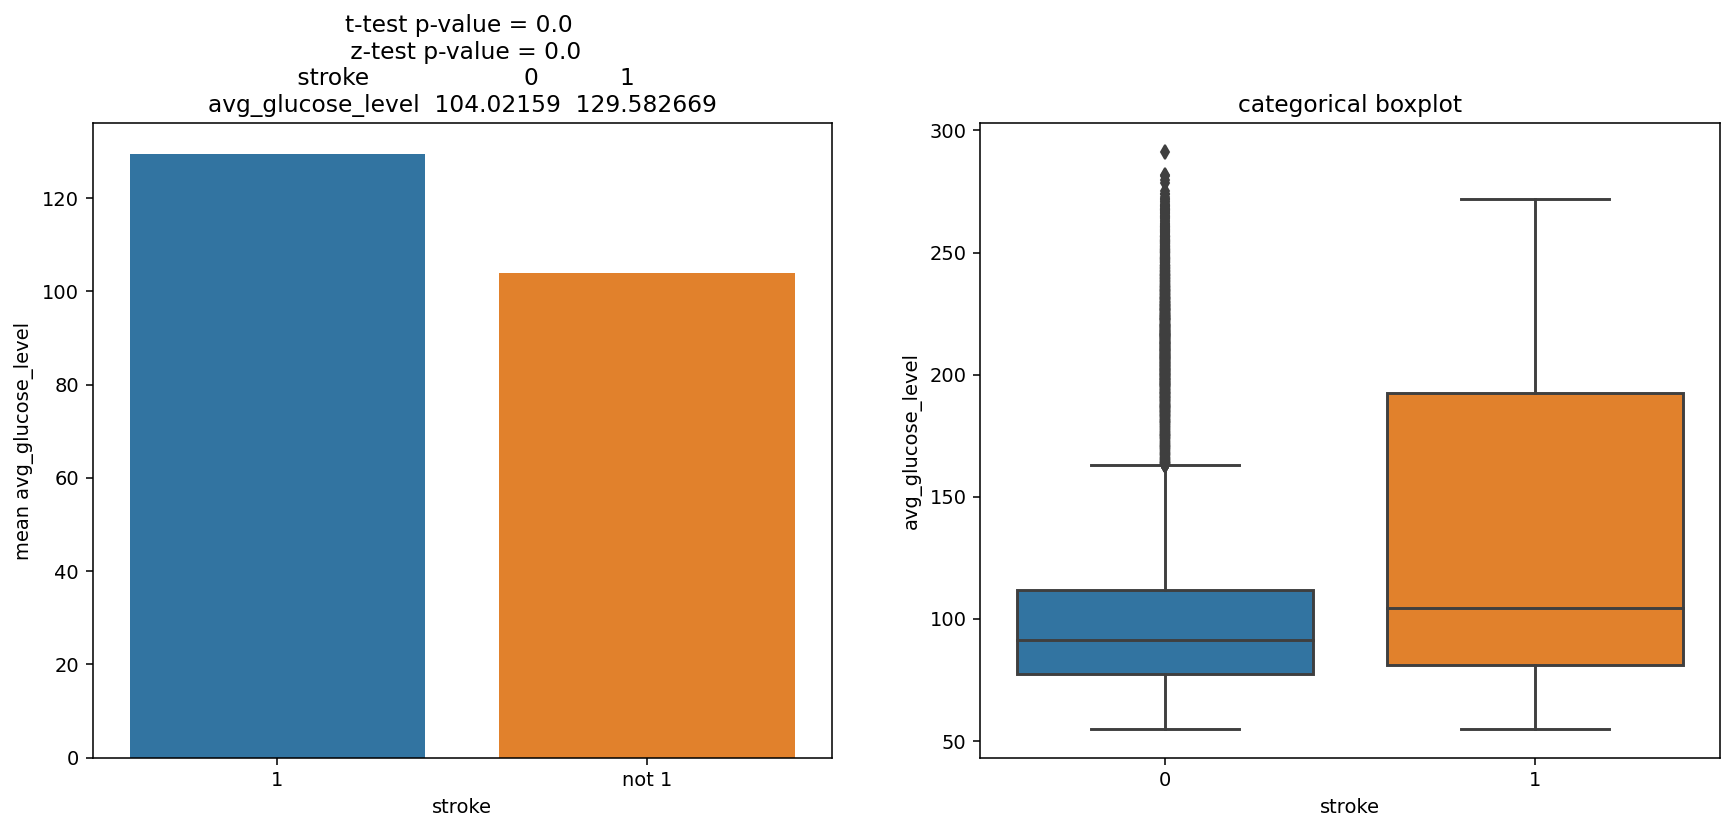

In [45]:
Bivariate_cont_cat(data_train, num_feats[1], 'stroke', 1)

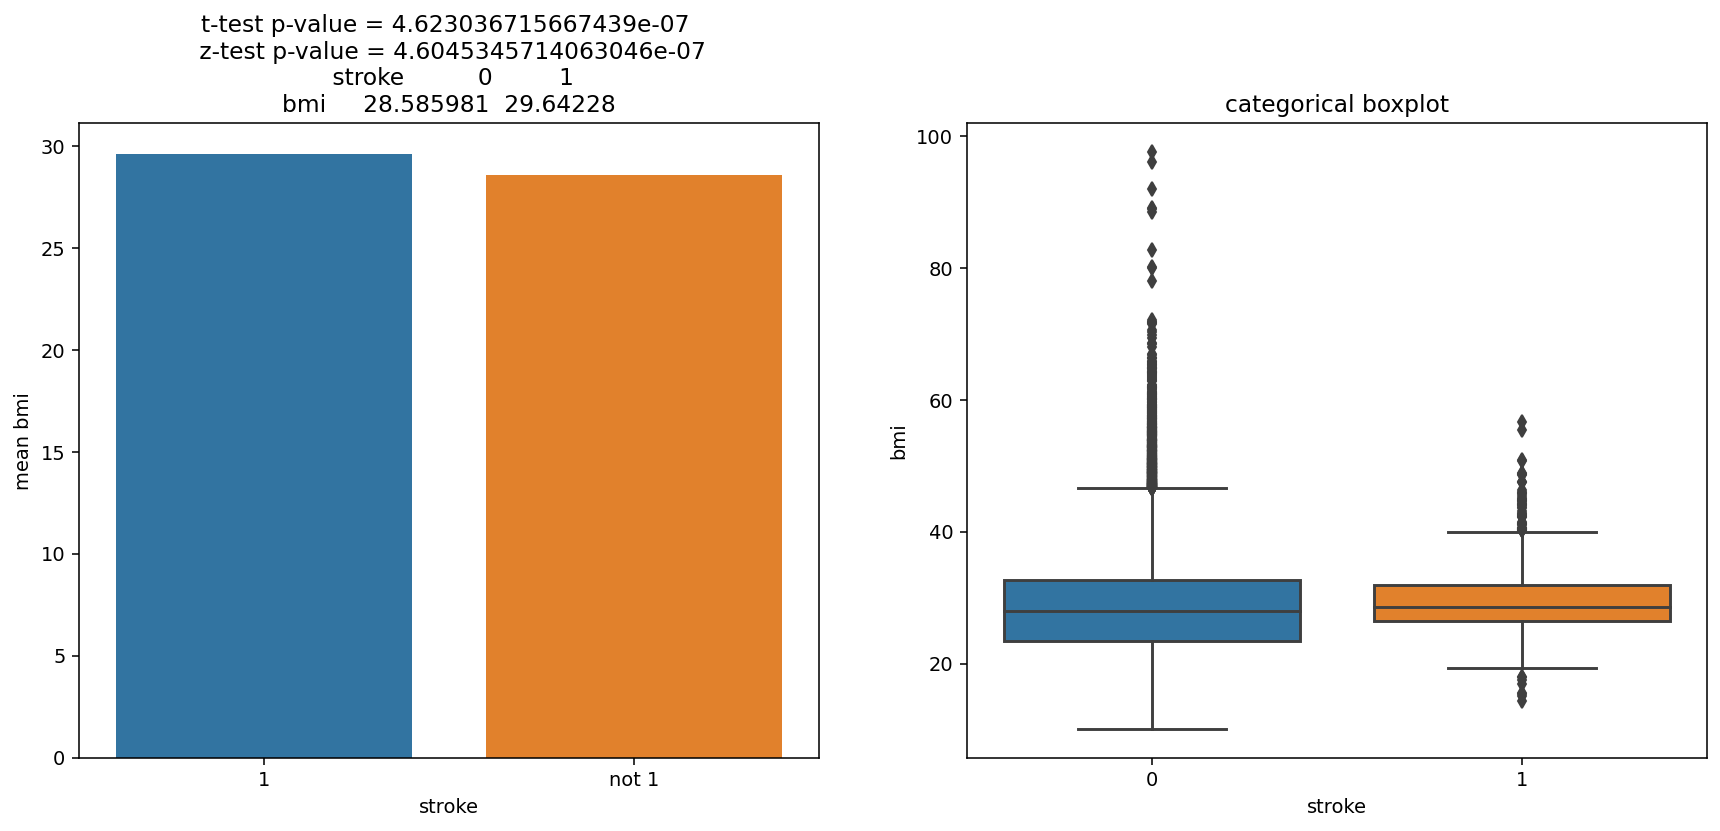

In [46]:
Bivariate_cont_cat(data_train, num_feats[2], 'stroke', 1)

Pre-processing & Feature Engineering

In [47]:
data_train['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [48]:
data_train['smoking_status'].value_counts()

never smoked       16053
Non determined     13292
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [49]:
data_train = pd.get_dummies(data_train,columns=['gender','ever_married','work_type','Residence_type','smoking_status', 'hypertension','heart_disease'])

In [50]:
data_train.dtypes

id                                  int64
age                               float64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
ever_married_No                     uint8
ever_married_Yes                    uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
smoking_status_Non determined       uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
hypertension_0                      uint8
hypertension_1                      uint8
heart_disease_0                   

In [51]:
data_train.drop(['id'], axis = 1, inplace=True)

In [52]:
data_train


,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,...,Residence_type_Rural,Residence_type_Urban,smoking_status_Non determined,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,3.0,95.12,18.0,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
1,58.0,87.96,39.2,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,1,0
2,8.0,110.89,17.6,0,1,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
3,70.0,69.04,35.9,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,14.0,161.28,19.1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,58.64,20.4,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
43396,56.0,213.61,55.4,0,1,0,0,0,1,1,...,0,1,0,1,0,0,1,0,1,0
43397,82.0,91.94,28.9,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
43398,40.0,99.16,33.2,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0


Correlation Matrix

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'avg_glucose_level'),
 Text(2.5, 0, 'bmi'),
 Text(3.5, 0, 'stroke'),
 Text(4.5, 0, 'gender_Female'),
 Text(5.5, 0, 'gender_Male'),
 Text(6.5, 0, 'gender_Other'),
 Text(7.5, 0, 'ever_married_No'),
 Text(8.5, 0, 'ever_married_Yes'),
 Text(9.5, 0, 'work_type_Govt_job'),
 Text(10.5, 0, 'work_type_Never_worked'),
 Text(11.5, 0, 'work_type_Private'),
 Text(12.5, 0, 'work_type_Self-employed'),
 Text(13.5, 0, 'work_type_children'),
 Text(14.5, 0, 'Residence_type_Rural'),
 Text(15.5, 0, 'Residence_type_Urban'),
 Text(16.5, 0, 'smoking_status_Non determined'),
 Text(17.5, 0, 'smoking_status_formerly smoked'),
 Text(18.5, 0, 'smoking_status_never smoked'),
 Text(19.5, 0, 'smoking_status_smokes'),
 Text(20.5, 0, 'hypertension_0'),
 Text(21.5, 0, 'hypertension_1'),
 Text(22.5, 0, 'heart_disease_0'),
 Text(23.5, 0, 'heart_disease_1')]

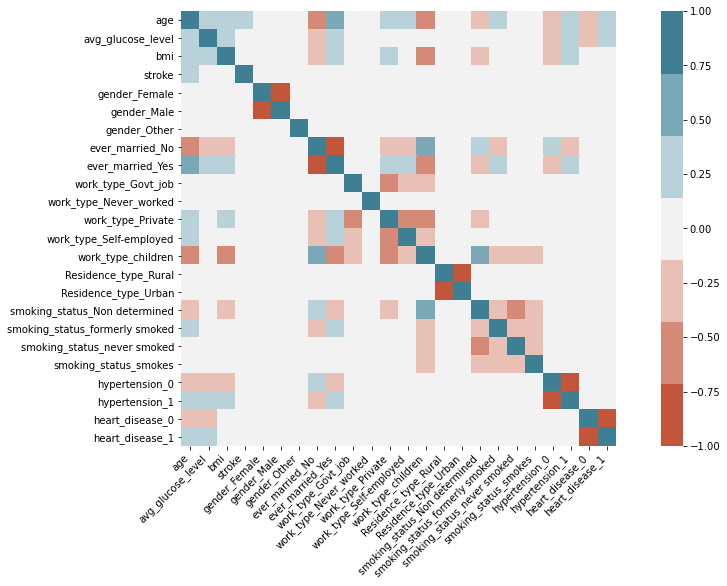

In [53]:
corr = data_train.corr()
plt.figure(figsize = (16,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=7),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [54]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled = std.fit_transform(data_train[num_feats])
scaled = pd.DataFrame(scaled,columns=num_feats)

In [55]:
data_train1 = data_train.copy()
data_train1 = data_train1.drop(num_feats,axis = 1)
data_train0 = data_train1.merge(scaled,left_index=True,right_index=True,how = "left")

In [56]:
data_train0 

,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,...,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,age,avg_glucose_level,bmi
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,-1.741517,-0.217176,-1.388469
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,1,0,0.700823,-0.383258,1.387150
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,-1.519486,0.148621,-1.440839
3,0,1,0,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,1.233697,-0.822123,0.955096
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,-1.253049,1.317458,-1.244451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.430674,-1.063359,-1.074248
43396,0,1,0,0,0,1,1,0,0,0,...,1,0,0,1,0,1,0,0.612011,2.531294,3.508142
43397,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,1,0,1.766571,-0.290939,0.038618
43398,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,-0.098488,-0.123465,0.601597


# EDA, imputation and pre-processing of test dataset

In [57]:
data_test.isnull().sum()
data_test = pd.read_csv("test.csv")

In [58]:
data_test['bmi']=data_test['bmi'].fillna(data_test['bmi'].mean())
data_test['smoking_status']=data_test['smoking_status'].replace(np.nan, 'Non determined')
data_test = pd.get_dummies(data_test,columns=['gender','ever_married','work_type','Residence_type','smoking_status', 'hypertension','heart_disease'])

In [59]:
data_test

,id,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,...,Residence_type_Rural,Residence_type_Urban,smoking_status_Non determined,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,36306,80.0,83.84,21.1,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
1,61829,74.0,179.50,26.0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
2,14152,14.0,95.16,21.2,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
3,12997,28.0,94.76,23.4,0,1,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
4,40801,63.0,83.57,27.6,1,0,0,0,1,1,...,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18596,67353,20.0,74.43,18.4,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
18597,362,61.0,211.55,31.6,0,1,0,0,1,1,...,1,0,0,0,0,1,1,0,1,0
18598,29839,79.0,125.74,29.4,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
18599,6438,55.0,69.46,33.8,0,1,0,0,1,1,...,1,0,0,0,1,0,1,0,1,0


In [60]:
data_test.isnull().sum()

id                                0
age                               0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Non determined     0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
hypertension_0                    0
hypertension_1                    0
heart_disease_0                   0
heart_disease_1                   0
dtype: int64

In [61]:
IDcol=data_test['id']

In [62]:
data_test

,id,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,...,Residence_type_Rural,Residence_type_Urban,smoking_status_Non determined,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,36306,80.0,83.84,21.1,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
1,61829,74.0,179.50,26.0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
2,14152,14.0,95.16,21.2,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
3,12997,28.0,94.76,23.4,0,1,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
4,40801,63.0,83.57,27.6,1,0,0,0,1,1,...,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18596,67353,20.0,74.43,18.4,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
18597,362,61.0,211.55,31.6,0,1,0,0,1,1,...,1,0,0,0,0,1,1,0,1,0
18598,29839,79.0,125.74,29.4,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
18599,6438,55.0,69.46,33.8,0,1,0,0,1,1,...,1,0,0,0,1,0,1,0,1,0


In [63]:
std = StandardScaler()
scaled = std.fit_transform(data_test[num_feats])
scaled = pd.DataFrame(scaled,columns=num_feats)

In [64]:
data_test1 = data_test.copy()
data_test1 = data_test1.drop(num_feats,axis = 1)
data_test = data_test1.merge(scaled,left_index=True,right_index=True,how = "left")
data_test0=data_test

In [65]:
data_test0

,id,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,...,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,age,avg_glucose_level,bmi
0,36306,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,1.684326,-0.482246,-0.975457
1,61829,1,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,1.417983,1.763001,-0.333478
2,14152,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,-1.245438,-0.216553,-0.962355
3,12997,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,-0.623973,-0.225941,-0.674120
4,40801,1,0,0,0,1,1,0,0,0,...,0,1,0,1,0,1,0,0.929689,-0.488583,-0.123853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18596,67353,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,1,0,-0.979096,-0.703109,-1.329200
18597,362,0,1,0,0,1,1,0,0,0,...,0,0,1,1,0,1,0,0.840909,2.515250,0.400211
18598,29839,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,1.639935,0.501194,0.111976
18599,6438,0,1,0,0,1,1,0,0,0,...,0,1,0,1,0,1,0,0.574566,-0.819760,0.688447


In [66]:
data_test.drop(['id'],axis = 1, inplace=True)

In [67]:
data_test0

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,age,avg_glucose_level,bmi
0,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,1.684326,-0.482246,-0.975457
1,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,1.417983,1.763001,-0.333478
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,-1.245438,-0.216553,-0.962355
3,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,-0.623973,-0.225941,-0.674120
4,1,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,1,0,0.929689,-0.488583,-0.123853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18596,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,-0.979096,-0.703109,-1.329200
18597,0,1,0,0,1,1,0,0,0,0,...,0,0,1,1,0,1,0,0.840909,2.515250,0.400211
18598,1,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,1,0,1.639935,0.501194,0.111976
18599,0,1,0,0,1,1,0,0,0,0,...,0,1,0,1,0,1,0,0.574566,-0.819760,0.688447


# Model Building and Evaluation

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [69]:
from sklearn.metrics import classification_report,roc_auc_score, f1_score

In [70]:
X= data_train0.drop(['stroke'],axis = 1)
y=data_train0['stroke']

In [71]:
X

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,age,avg_glucose_level,bmi
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,-1.741517,-0.217176,-1.388469
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,1,0,0.700823,-0.383258,1.387150
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,-1.519486,0.148621,-1.440839
3,1,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,1.233697,-0.822123,0.955096
4,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,-1.253049,1.317458,-1.244451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,1,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,0,-1.430674,-1.063359,-1.074248
43396,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0.612011,2.531294,3.508142
43397,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,1,0,1.766571,-0.290939,0.038618
43398,0,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,1,0,-0.098488,-0.123465,0.601597


In [72]:
correlated_features = set()
correlation_matrix = X.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [73]:
correlated_features

{'Residence_type_Urban',
 'ever_married_Yes',
 'gender_Male',
 'heart_disease_1',
 'hypertension_1'}

In [74]:
X.drop(correlated_features, axis=1, inplace=True)


In [96]:
data_test.drop(correlated_features, axis=1, inplace=True)

In [146]:
# Splitting the data into Train and Validation set

from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(X,y,test_size=0.3,stratify=y, random_state=11)

In [147]:
lr_model = LogisticRegression(class_weight='balanced',random_state=101)
lr_model.fit(xtrain,ytrain)
pred = lr_model.predict(xvalid)
#print(classification_report(yvalid,pred))
auc = roc_auc_score(yvalid, lr_model.predict_proba(xvalid)[:,1]) 
print("Validation AUC-ROC="+str(auc))

Validation AUC-ROC=0.8383085231196798


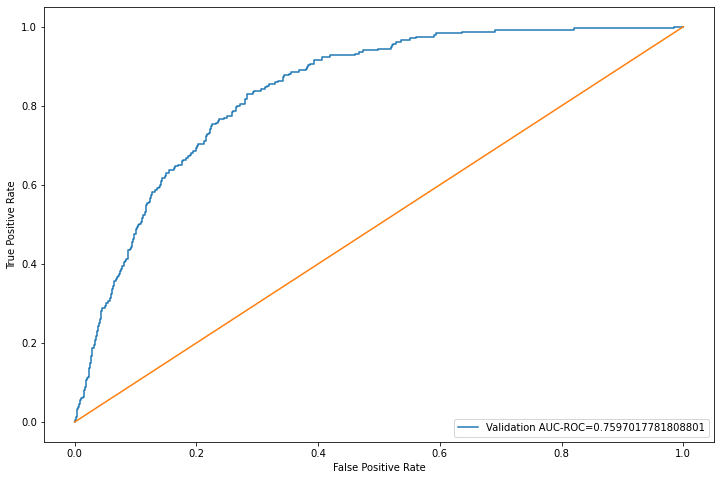

In [77]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(yvalid,lr_model.predict_proba(xvalid)[:,1])
auc = roc_auc_score(yvalid, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [162]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=12, step=1)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(), n_features_to_select=12)

In [163]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = X.columns
ranking_df['Rank'] = rfe.ranking_

In [164]:
ranked = ranking_df.sort_values(by=['Rank'])

In [165]:
ranked

,Feature_name,Rank
0,work_type_children,1
1,smoking_status_smokes,1
2,hypertension_0,1
3,heart_disease_0,1
4,age,1


In [166]:
X=X[['gender_Female', 'ever_married_No',  'work_type_Never_worked', 'work_type_Private', 'work_type_children', 'smoking_status_smokes','hypertension_0', 'heart_disease_0', 'age', 'avg_glucose_level']]

KeyError: "['work_type_Never_worked', 'gender_Female', 'ever_married_No', 'avg_glucose_level', 'work_type_Private'] not in index"

In [157]:
lr_model = LogisticRegression(class_weight='balanced',random_state=101)
lr_model.fit(xtrain,ytrain)
pred = lr_model.predict(xvalid)
#print(classification_report(yvalid,pred))
auc = roc_auc_score(yvalid, lr_model.predict_proba(xvalid)[:,1]) 
print("Validation AUC-ROC="+str(auc))

Validation AUC-ROC=0.8383085231196798


In [131]:
X.columns

Index(['gender_Female', 'ever_married_No', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'smoking_status_Non determined', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'hypertension_0', 'heart_disease_0', 'age', 'avg_glucose_level', 'bmi'],
      dtype='object')

In [85]:
# define hyperparameters
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
crange = np.arange(0.5, 20.0, 0.5)
hyperparam_grid = {"class_weight": w
                   ,"penalty": ["l1", "l2"]
                   ,"C": crange
                   ,"fit_intercept": [True, False]  }

In [120]:
from sklearn.model_selection import GridSearchCV
# logistic model classifier
lg4 = LogisticRegression(random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg4,hyperparam_grid,scoring="roc_auc", cv=10, n_jobs=-1, refit=True)
grid.fit(xvalid,yvalid)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

KeyboardInterrupt: 

In [139]:
data_test=data_test[['gender_Female', 'ever_married_No', 
       'work_type_Never_worked', 'work_type_Private'
       , 'work_type_children', 'smoking_status_smokes',
       'hypertension_0', 'heart_disease_0', 'age', 'avg_glucose_level']]

In [140]:
lr_model = LogisticRegression(class_weight={0: 1.0, 1: 1.0},random_state=101)
lr_model.fit(xtrain,ytrain)
pred = lr_model.predict(xvalid)
#print(classification_report(yvalid,pred))
auc = roc_auc_score(yvalid, lr_model.predict_proba(xvalid)[:,1]) 
print("Validation AUC-ROC="+str(auc))

Validation AUC-ROC=0.8407896554306493


# Prediction on Test Set 

In [141]:
Y_test_label_cat= lr_model.predict(data_test)
Y_test_prob_cat= lr_model.predict_proba(data_test)


In [142]:
Y_test_label_cat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [143]:
Y_test_prob_cat[:,1]

array([0.07222698, 0.10495193, 0.00045373, ..., 0.0745102 , 0.01028994,
       0.00362973])

In [106]:
sample=pd.DataFrame()
sample['id']=IDcol
sample['stroke']=Y_test_prob_cat[:,1]
sample.to_csv('samplesubmission1.csv', index=False)